In [1]:
import sciann as sn;
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt
from sciann.utils.math import diff, sign, sin;

---------------------- SCIANN 0.6.8.6 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.9.3 
Python Version: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)] 



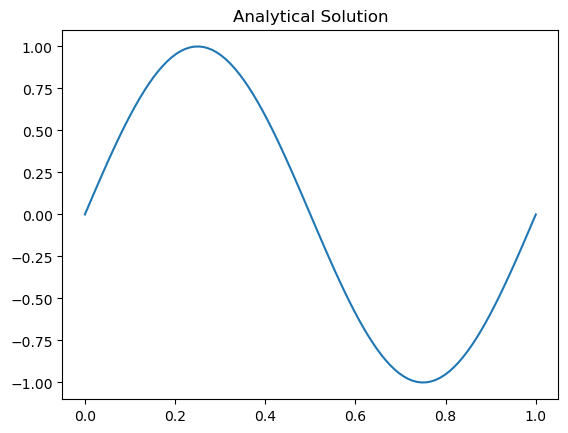

In [2]:
x_discrete=np.linspace(0, 1, 100) 
u_analytical= np.sin(2*np.pi*x_discrete)
plt.figure
plt.title('Analytical Solution')
plt.plot(x_discrete, u_analytical);

In [3]:
x = sn.Variable('x')
u= sn.Functional('u', [x], 4*[20], 'tanh')

In [4]:
EA=1
L=1
p= 4*((np.pi)**2)*(sin(2*np.pi*x))

In [5]:
L1= sn.rename(diff(u, x, order=2)+p, 'L1')

In [6]:
tolerance=0.0000001
L2= (1-sign(x-(0+tolerance)))*u
L3= (1+sign(x-(1-tolerance)))*u

In [7]:
m= sn.SciModel([x], [L1, L2, L3], loss_func='mse', optimizer='adam')

In [8]:
h= m.train([x_discrete], ['zeros', 'zeros', 'zeros'], epochs=2500, learning_rate=0.002, verbose=1)


Total samples: 100 
Batch size: 64 
Total batches: 2 

Epoch 1/2500
2/2 [==============================] - 0s 8ms/step - batch: 0.5000 - size: 50.0000 - loss: 689.9111 - L1_loss: 686.2015 - mul_3_loss: 6.5872e-04 - mul_4_loss: 7.4979e-04 - lr: 0.0020 - time: 0.4512
Epoch 2/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 664.9977 - L1_loss: 663.1960 - mul_3_loss: 0.0015 - mul_4_loss: 1.1713e-05 - lr: 0.0020 - time: 0.0913
Epoch 3/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 622.5933 - L1_loss: 617.0791 - mul_3_loss: 0.0021 - mul_4_loss: 0.0021 - lr: 0.0020 - time: 0.1005
Epoch 4/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 608.3717 - L1_loss: 612.9391 - mul_3_loss: 0.0016 - mul_4_loss: 0.0058 - lr: 0.0020 - time: 0.1151
Epoch 5/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 560.3818 - L1_lo

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 15.5541 - L1_loss: 14.3788 - mul_3_loss: 0.5340 - mul_4_loss: 0.9386 - lr: 0.0020 - time: 0.1076
Epoch 41/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 13.8617 - L1_loss: 12.7758 - mul_3_loss: 0.5386 - mul_4_loss: 0.5482 - lr: 0.0020 - time: 0.0999
Epoch 42/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 13.3628 - L1_loss: 11.9935 - mul_3_loss: 0.5375 - mul_4_loss: 0.9843 - lr: 0.0020 - time: 0.1105
Epoch 43/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 11.9207 - L1_loss: 10.4570 - mul_3_loss: 0.5342 - mul_4_loss: 0.5526 - lr: 0.0020 - time: 0.1074
Epoch 44/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 11.5476 - L1_loss: 10.1653 - mul_3_loss: 0.5331 - mul_4_loss: 0.5592 - lr: 0.0020 - time: 0.1075
Epoc

Epoch 81/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 7.2564 - L1_loss: 5.4625 - mul_3_loss: 0.8932 - mul_4_loss: 0.6372 - lr: 0.0020 - time: 0.1184
Epoch 82/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 7.3572 - L1_loss: 5.8516 - mul_3_loss: 0.4995 - mul_4_loss: 0.6319 - lr: 0.0020 - time: 0.1058
Epoch 83/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 8.2016 - L1_loss: 6.8315 - mul_3_loss: 0.4990 - mul_4_loss: 1.1350 - lr: 0.0020 - time: 0.0963
Epoch 84/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 7.2972 - L1_loss: 5.9228 - mul_3_loss: 0.4968 - mul_4_loss: 0.6392 - lr: 0.0020 - time: 0.1096
Epoch 85/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 7.6137 - L1_loss: 5.9849 - mul_3_loss: 0.4945 - mul_4_loss: 1.1329 - lr: 0.0020 - time: 0.1040


2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 6.2903 - L1_loss: 4.8648 - mul_3_loss: 0.8133 - mul_4_loss: 0.6339 - lr: 0.0020 - time: 0.1043
Epoch 122/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 5.6661 - L1_loss: 4.3396 - mul_3_loss: 0.4562 - mul_4_loss: 0.6320 - lr: 0.0020 - time: 0.1078
Epoch 123/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 5.8093 - L1_loss: 4.5174 - mul_3_loss: 0.4532 - mul_4_loss: 0.6267 - lr: 0.0020 - time: 0.1045
Epoch 124/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 6.8500 - L1_loss: 5.6519 - mul_3_loss: 0.4534 - mul_4_loss: 1.1205 - lr: 0.0020 - time: 0.1175
Epoch 125/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 5.5118 - L1_loss: 4.1385 - mul_3_loss: 0.4529 - mul_4_loss: 0.6297 - lr: 0.0020 - time: 0.1048
Epoch 126/

2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 4.5222 - L1_loss: 3.0580 - mul_3_loss: 0.7163 - mul_4_loss: 0.5779 - lr: 0.0020 - time: 0.1160
Epoch 162/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 5.3351 - L1_loss: 4.2069 - mul_3_loss: 0.4022 - mul_4_loss: 1.0248 - lr: 0.0020 - time: 0.1041
Epoch 163/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 5.3041 - L1_loss: 4.2045 - mul_3_loss: 0.4003 - mul_4_loss: 1.0197 - lr: 0.0020 - time: 0.1084
Epoch 164/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 5.0926 - L1_loss: 3.8917 - mul_3_loss: 0.3969 - mul_4_loss: 1.0170 - lr: 0.0020 - time: 0.1009
Epoch 165/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 4.3430 - L1_loss: 3.2625 - mul_3_loss: 0.3954 - mul_4_loss: 0.5683 - lr: 0.0020 - time: 0.1000
Epoch 166/

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 2.9438 - L1_loss: 1.9547 - mul_3_loss: 0.3426 - mul_4_loss: 0.4714 - lr: 0.0020 - time: 0.0995
Epoch 202/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 3.2624 - L1_loss: 2.1763 - mul_3_loss: 0.6061 - mul_4_loss: 0.4694 - lr: 0.0020 - time: 0.1101
Epoch 203/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 2.9253 - L1_loss: 2.0077 - mul_3_loss: 0.3403 - mul_4_loss: 0.4685 - lr: 0.0020 - time: 0.1109
Epoch 204/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 2.7865 - L1_loss: 1.7940 - mul_3_loss: 0.3384 - mul_4_loss: 0.4668 - lr: 0.0020 - time: 0.1026
Epoch 205/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 2.8492 - L1_loss: 1.8567 - mul_3_loss: 0.3360 - mul_4_loss: 0.4624 - lr: 0.0020 - time: 0.1088
Epoch 206/

2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 2.0572 - L1_loss: 1.2390 - mul_3_loss: 0.2878 - mul_4_loss: 0.4020 - lr: 0.0020 - time: 0.1047
Epoch 242/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 2.1438 - L1_loss: 1.3951 - mul_3_loss: 0.2867 - mul_4_loss: 0.4008 - lr: 0.0020 - time: 0.0936
Epoch 243/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 2.2162 - L1_loss: 1.2561 - mul_3_loss: 0.5080 - mul_4_loss: 0.3991 - lr: 0.0020 - time: 0.1202
Epoch 244/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 2.3187 - L1_loss: 1.3782 - mul_3_loss: 0.5071 - mul_4_loss: 0.3992 - lr: 0.0020 - time: 0.1024
Epoch 245/2500
2/2 [==============================] - 0s 7ms/step - batch: 0.5000 - size: 50.0000 - loss: 2.1442 - L1_loss: 1.2080 - mul_3_loss: 0.5046 - mul_4_loss: 0.3971 - lr: 0.0020 - time: 0.1106
Epoch 246/

2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 1.5902 - L1_loss: 0.9301 - mul_3_loss: 0.2327 - mul_4_loss: 0.3410 - lr: 0.0020 - time: 0.1021
Epoch 282/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 1.5647 - L1_loss: 0.8229 - mul_3_loss: 0.4106 - mul_4_loss: 0.3390 - lr: 0.0020 - time: 0.1141
Epoch 283/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 1.6055 - L1_loss: 0.8390 - mul_3_loss: 0.4081 - mul_4_loss: 0.3377 - lr: 0.0020 - time: 0.1152
Epoch 284/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 1.6173 - L1_loss: 0.8741 - mul_3_loss: 0.4071 - mul_4_loss: 0.3369 - lr: 0.0020 - time: 0.0935
Epoch 285/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 1.6243 - L1_loss: 0.8849 - mul_3_loss: 0.4058 - mul_4_loss: 0.3359 - lr: 0.0020 - time: 0.1049
Epoch 286/

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 1.0696 - L1_loss: 0.4565 - mul_3_loss: 0.3372 - mul_4_loss: 0.2843 - lr: 0.0020 - time: 0.1051
Epoch 322/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.9643 - L1_loss: 0.4383 - mul_3_loss: 0.1891 - mul_4_loss: 0.2828 - lr: 0.0020 - time: 0.1092
Epoch 323/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 1.2583 - L1_loss: 0.6288 - mul_3_loss: 0.3340 - mul_4_loss: 0.2813 - lr: 0.0020 - time: 0.1055
Epoch 324/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 1.0758 - L1_loss: 0.5649 - mul_3_loss: 0.1868 - mul_4_loss: 0.2803 - lr: 0.0020 - time: 0.1069
Epoch 325/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.9815 - L1_loss: 0.4725 - mul_3_loss: 0.1861 - mul_4_loss: 0.2801 - lr: 0.0020 - time: 0.1171
Epoch 326/

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.7945 - L1_loss: 0.2744 - mul_3_loss: 0.2833 - mul_4_loss: 0.2346 - lr: 0.0020 - time: 0.1005
Epoch 362/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.8802 - L1_loss: 0.3457 - mul_3_loss: 0.1580 - mul_4_loss: 0.4163 - lr: 0.0020 - time: 0.1007
Epoch 363/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.8504 - L1_loss: 0.3086 - mul_3_loss: 0.1574 - mul_4_loss: 0.4102 - lr: 0.0020 - time: 0.1090
Epoch 364/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.7031 - L1_loss: 0.1938 - mul_3_loss: 0.2786 - mul_4_loss: 0.2298 - lr: 0.0020 - time: 0.1062
Epoch 365/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.8611 - L1_loss: 0.2468 - mul_3_loss: 0.2784 - mul_4_loss: 0.4076 - lr: 0.0020 - time: 0.1023
Epoch 366/

2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.5071 - L1_loss: 0.1389 - mul_3_loss: 0.1387 - mul_4_loss: 0.1968 - lr: 0.0020 - time: 0.1030
Epoch 402/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.5073 - L1_loss: 0.1440 - mul_3_loss: 0.1384 - mul_4_loss: 0.1960 - lr: 0.0020 - time: 0.0974
Epoch 403/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.5791 - L1_loss: 0.1966 - mul_3_loss: 0.1384 - mul_4_loss: 0.1983 - lr: 0.0020 - time: 0.1161
Epoch 404/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.5892 - L1_loss: 0.2328 - mul_3_loss: 0.1382 - mul_4_loss: 0.1962 - lr: 0.0020 - time: 0.1063
Epoch 405/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.6917 - L1_loss: 0.3015 - mul_3_loss: 0.1377 - mul_4_loss: 0.1972 - lr: 0.0020 - time: 0.1068
Epoch 406/

2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.7094 - L1_loss: 0.3854 - mul_3_loss: 0.1243 - mul_4_loss: 0.1688 - lr: 0.0020 - time: 0.1061
Epoch 442/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.8284 - L1_loss: 0.4946 - mul_3_loss: 0.1242 - mul_4_loss: 0.1681 - lr: 0.0020 - time: 0.1111
Epoch 443/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 1.0252 - L1_loss: 0.6802 - mul_3_loss: 0.2211 - mul_4_loss: 0.1725 - lr: 0.0020 - time: 0.0971
Epoch 444/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 1.2027 - L1_loss: 0.7587 - mul_3_loss: 0.2216 - mul_4_loss: 0.1709 - lr: 0.0020 - time: 0.1164
Epoch 445/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 1.1301 - L1_loss: 0.6938 - mul_3_loss: 0.1244 - mul_4_loss: 0.3091 - lr: 0.0020 - time: 0.1057
Epoch 446/

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.5040 - L1_loss: 0.0762 - mul_3_loss: 0.1999 - mul_4_loss: 0.2751 - lr: 0.0020 - time: 0.1069
Epoch 482/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3746 - L1_loss: 0.0816 - mul_3_loss: 0.1122 - mul_4_loss: 0.1544 - lr: 0.0020 - time: 0.1061
Epoch 483/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.4115 - L1_loss: 0.0633 - mul_3_loss: 0.1982 - mul_4_loss: 0.1531 - lr: 0.0020 - time: 0.1080
Epoch 484/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3641 - L1_loss: 0.0734 - mul_3_loss: 0.1114 - mul_4_loss: 0.1530 - lr: 0.0020 - time: 0.1082
Epoch 485/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.4452 - L1_loss: 0.0809 - mul_3_loss: 0.1111 - mul_4_loss: 0.2697 - lr: 0.0020 - time: 0.1061
Epoch 486/

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3733 - L1_loss: 0.0554 - mul_3_loss: 0.1812 - mul_4_loss: 0.1391 - lr: 0.0020 - time: 0.1020
Epoch 522/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3142 - L1_loss: 0.0509 - mul_3_loss: 0.1016 - mul_4_loss: 0.1387 - lr: 0.0020 - time: 0.1030
Epoch 523/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3645 - L1_loss: 0.0490 - mul_3_loss: 0.1799 - mul_4_loss: 0.1384 - lr: 0.0020 - time: 0.1190
Epoch 524/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3651 - L1_loss: 0.0505 - mul_3_loss: 0.1796 - mul_4_loss: 0.1380 - lr: 0.0020 - time: 0.1039
Epoch 525/2500
2/2 [==============================] - 0s 7ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3653 - L1_loss: 0.0520 - mul_3_loss: 0.1791 - mul_4_loss: 0.1374 - lr: 0.0020 - time: 0.1107
Epoch 526/

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.5461 - L1_loss: 0.1928 - mul_3_loss: 0.1635 - mul_4_loss: 0.2257 - lr: 0.0020 - time: 0.0997
Epoch 562/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.5161 - L1_loss: 0.2334 - mul_3_loss: 0.1627 - mul_4_loss: 0.1235 - lr: 0.0020 - time: 0.1149
Epoch 563/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.5446 - L1_loss: 0.2584 - mul_3_loss: 0.1625 - mul_4_loss: 0.1274 - lr: 0.0020 - time: 0.1089
Epoch 564/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.4889 - L1_loss: 0.2514 - mul_3_loss: 0.0911 - mul_4_loss: 0.1238 - lr: 0.0020 - time: 0.1032
Epoch 565/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.4522 - L1_loss: 0.2200 - mul_3_loss: 0.0906 - mul_4_loss: 0.1250 - lr: 0.0020 - time: 0.1000
Epoch 566/

2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2502 - L1_loss: 0.0322 - mul_3_loss: 0.0839 - mul_4_loss: 0.1151 - lr: 0.0020 - time: 0.1054
Epoch 602/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2950 - L1_loss: 0.0339 - mul_3_loss: 0.1490 - mul_4_loss: 0.1151 - lr: 0.0020 - time: 0.1177
Epoch 603/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3550 - L1_loss: 0.0374 - mul_3_loss: 0.1482 - mul_4_loss: 0.2034 - lr: 0.0020 - time: 0.1164
Epoch 604/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2505 - L1_loss: 0.0336 - mul_3_loss: 0.0831 - mul_4_loss: 0.1146 - lr: 0.0020 - time: 0.1021
Epoch 605/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3530 - L1_loss: 0.0364 - mul_3_loss: 0.1474 - mul_4_loss: 0.2025 - lr: 0.0020 - time: 0.1069
Epoch 606/

2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2539 - L1_loss: 0.0581 - mul_3_loss: 0.0746 - mul_4_loss: 0.1036 - lr: 0.0020 - time: 0.1057
Epoch 642/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3135 - L1_loss: 0.0641 - mul_3_loss: 0.0744 - mul_4_loss: 0.1840 - lr: 0.0020 - time: 0.1069
Epoch 643/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2570 - L1_loss: 0.0616 - mul_3_loss: 0.0744 - mul_4_loss: 0.1026 - lr: 0.0020 - time: 0.1236
Epoch 644/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2354 - L1_loss: 0.0398 - mul_3_loss: 0.0745 - mul_4_loss: 0.1036 - lr: 0.0020 - time: 0.1028
Epoch 645/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2736 - L1_loss: 0.0413 - mul_3_loss: 0.1325 - mul_4_loss: 0.1032 - lr: 0.0020 - time: 0.1121
Epoch 646/

2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3163 - L1_loss: 0.0857 - mul_3_loss: 0.0672 - mul_4_loss: 0.1688 - lr: 0.0020 - time: 0.1053
Epoch 682/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3119 - L1_loss: 0.1028 - mul_3_loss: 0.1190 - mul_4_loss: 0.0951 - lr: 0.0020 - time: 0.1059
Epoch 683/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2626 - L1_loss: 0.0907 - mul_3_loss: 0.0667 - mul_4_loss: 0.0938 - lr: 0.0020 - time: 0.1057
Epoch 684/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2940 - L1_loss: 0.0713 - mul_3_loss: 0.0666 - mul_4_loss: 0.1666 - lr: 0.0020 - time: 0.1088
Epoch 685/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3082 - L1_loss: 0.1026 - mul_3_loss: 0.1183 - mul_4_loss: 0.0952 - lr: 0.0020 - time: 0.1044
Epoch 686/

2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2229 - L1_loss: 0.0344 - mul_3_loss: 0.1052 - mul_4_loss: 0.0860 - lr: 0.0020 - time: 0.0999
Epoch 722/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2575 - L1_loss: 0.0542 - mul_3_loss: 0.0590 - mul_4_loss: 0.1525 - lr: 0.0020 - time: 0.1010
Epoch 723/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3178 - L1_loss: 0.0865 - mul_3_loss: 0.1046 - mul_4_loss: 0.1501 - lr: 0.0020 - time: 0.1038
Epoch 724/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2413 - L1_loss: 0.0400 - mul_3_loss: 0.0588 - mul_4_loss: 0.1510 - lr: 0.0020 - time: 0.1069
Epoch 725/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1978 - L1_loss: 0.0435 - mul_3_loss: 0.0587 - mul_4_loss: 0.0844 - lr: 0.0020 - time: 0.1166
Epoch 726/

2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2625 - L1_loss: 0.0582 - mul_3_loss: 0.0902 - mul_4_loss: 0.1354 - lr: 0.0020 - time: 0.1061
Epoch 762/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2552 - L1_loss: 0.0717 - mul_3_loss: 0.0507 - mul_4_loss: 0.1362 - lr: 0.0020 - time: 0.1009
Epoch 763/2500
2/2 [==============================] - 0s 7ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2572 - L1_loss: 0.0729 - mul_3_loss: 0.0505 - mul_4_loss: 0.1376 - lr: 0.0020 - time: 0.1206
Epoch 764/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2097 - L1_loss: 0.0296 - mul_3_loss: 0.0505 - mul_4_loss: 0.1374 - lr: 0.0020 - time: 0.0936
Epoch 765/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2050 - L1_loss: 0.0655 - mul_3_loss: 0.0503 - mul_4_loss: 0.0767 - lr: 0.0020 - time: 0.1129
Epoch 766/

2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3208 - L1_loss: 0.1845 - mul_3_loss: 0.0440 - mul_4_loss: 0.0665 - lr: 0.0020 - time: 0.1048
Epoch 802/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3195 - L1_loss: 0.1549 - mul_3_loss: 0.0443 - mul_4_loss: 0.1202 - lr: 0.0020 - time: 0.1007
Epoch 803/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2840 - L1_loss: 0.1417 - mul_3_loss: 0.0783 - mul_4_loss: 0.0683 - lr: 0.0020 - time: 0.0993
Epoch 804/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2413 - L1_loss: 0.0986 - mul_3_loss: 0.0773 - mul_4_loss: 0.0675 - lr: 0.0020 - time: 0.1243
Epoch 805/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1899 - L1_loss: 0.0650 - mul_3_loss: 0.0433 - mul_4_loss: 0.0680 - lr: 0.0020 - time: 0.1029
Epoch 806/

2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2330 - L1_loss: 0.1221 - mul_3_loss: 0.0365 - mul_4_loss: 0.0597 - lr: 0.0020 - time: 0.1015
Epoch 842/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2100 - L1_loss: 0.0835 - mul_3_loss: 0.0651 - mul_4_loss: 0.0618 - lr: 0.0020 - time: 0.1042
Epoch 843/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2216 - L1_loss: 0.0931 - mul_3_loss: 0.0653 - mul_4_loss: 0.0602 - lr: 0.0020 - time: 0.1110
Epoch 844/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1852 - L1_loss: 0.0811 - mul_3_loss: 0.0365 - mul_4_loss: 0.0599 - lr: 0.0020 - time: 0.1205
Epoch 845/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3019 - L1_loss: 0.1582 - mul_3_loss: 0.0365 - mul_4_loss: 0.1067 - lr: 0.0020 - time: 0.1055
Epoch 846/

2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.5371 - L1_loss: 0.4188 - mul_3_loss: 0.0302 - mul_4_loss: 0.0957 - lr: 0.0020 - time: 0.1168
Epoch 882/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.5204 - L1_loss: 0.3916 - mul_3_loss: 0.0536 - mul_4_loss: 0.0512 - lr: 0.0020 - time: 0.1195
Epoch 883/2500
2/2 [==============================] - 0s 7ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.6055 - L1_loss: 0.5079 - mul_3_loss: 0.0299 - mul_4_loss: 0.0980 - lr: 0.0020 - time: 0.1072
Epoch 884/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.6629 - L1_loss: 0.5661 - mul_3_loss: 0.0297 - mul_4_loss: 0.0542 - lr: 0.0020 - time: 0.1139
Epoch 885/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.5783 - L1_loss: 0.4755 - mul_3_loss: 0.0523 - mul_4_loss: 0.0898 - lr: 0.0020 - time: 0.1052
Epoch 886/

2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1839 - L1_loss: 0.0700 - mul_3_loss: 0.0446 - mul_4_loss: 0.0827 - lr: 0.0020 - time: 0.1069
Epoch 922/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1297 - L1_loss: 0.0503 - mul_3_loss: 0.0250 - mul_4_loss: 0.0473 - lr: 0.0020 - time: 0.1057
Epoch 923/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1499 - L1_loss: 0.0336 - mul_3_loss: 0.0444 - mul_4_loss: 0.0840 - lr: 0.0020 - time: 0.1092
Epoch 924/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1028 - L1_loss: 0.0240 - mul_3_loss: 0.0248 - mul_4_loss: 0.0473 - lr: 0.0020 - time: 0.1058
Epoch 925/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1131 - L1_loss: 0.0347 - mul_3_loss: 0.0246 - mul_4_loss: 0.0465 - lr: 0.0020 - time: 0.1075
Epoch 926/

2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0935 - L1_loss: 0.0250 - mul_3_loss: 0.0210 - mul_4_loss: 0.0411 - lr: 0.0020 - time: 0.1068
Epoch 962/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0936 - L1_loss: 0.0254 - mul_3_loss: 0.0209 - mul_4_loss: 0.0407 - lr: 0.0020 - time: 0.0983
Epoch 963/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1055 - L1_loss: 0.0173 - mul_3_loss: 0.0207 - mul_4_loss: 0.0712 - lr: 0.0020 - time: 0.1119
Epoch 964/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1055 - L1_loss: 0.0173 - mul_3_loss: 0.0206 - mul_4_loss: 0.0713 - lr: 0.0020 - time: 0.1105
Epoch 965/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1137 - L1_loss: 0.0250 - mul_3_loss: 0.0206 - mul_4_loss: 0.0715 - lr: 0.0020 - time: 0.1041
Epoch 966/

2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0863 - L1_loss: 0.0206 - mul_3_loss: 0.0305 - mul_4_loss: 0.0351 - lr: 0.0020 - time: 0.0980
Epoch 1002/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0664 - L1_loss: 0.0093 - mul_3_loss: 0.0171 - mul_4_loss: 0.0350 - lr: 0.0020 - time: 0.1075
Epoch 1003/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0861 - L1_loss: 0.0122 - mul_3_loss: 0.0169 - mul_4_loss: 0.0614 - lr: 0.0020 - time: 0.1119
Epoch 1004/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0742 - L1_loss: 0.0095 - mul_3_loss: 0.0300 - mul_4_loss: 0.0343 - lr: 0.0020 - time: 0.1069
Epoch 1005/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0620 - L1_loss: 0.0057 - mul_3_loss: 0.0168 - mul_4_loss: 0.0345 - lr: 0.0020 - time: 0.1086
Epoch 

2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1328 - L1_loss: 0.0782 - mul_3_loss: 0.0139 - mul_4_loss: 0.0305 - lr: 0.0020 - time: 0.1029
Epoch 1042/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1105 - L1_loss: 0.0474 - mul_3_loss: 0.0137 - mul_4_loss: 0.0523 - lr: 0.0020 - time: 0.1105
Epoch 1043/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1042 - L1_loss: 0.0421 - mul_3_loss: 0.0136 - mul_4_loss: 0.0544 - lr: 0.0020 - time: 0.1061
Epoch 1044/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0999 - L1_loss: 0.0496 - mul_3_loss: 0.0241 - mul_4_loss: 0.0286 - lr: 0.0020 - time: 0.1213
Epoch 1045/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1020 - L1_loss: 0.0513 - mul_3_loss: 0.0134 - mul_4_loss: 0.0294 - lr: 0.0020 - time: 0.0979
Epoch 

2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2827 - L1_loss: 0.2229 - mul_3_loss: 0.0198 - mul_4_loss: 0.0256 - lr: 0.0020 - time: 0.1077
Epoch 1082/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.4007 - L1_loss: 0.3619 - mul_3_loss: 0.0114 - mul_4_loss: 0.0281 - lr: 0.0020 - time: 0.0998
Epoch 1083/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.4688 - L1_loss: 0.4143 - mul_3_loss: 0.0116 - mul_4_loss: 0.0473 - lr: 0.0020 - time: 0.1042
Epoch 1084/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2186 - L1_loss: 0.1827 - mul_3_loss: 0.0115 - mul_4_loss: 0.0265 - lr: 0.0020 - time: 0.1164
Epoch 1085/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1763 - L1_loss: 0.1460 - mul_3_loss: 0.0111 - mul_4_loss: 0.0248 - lr: 0.0020 - time: 0.1063
Epoch 

2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0574 - L1_loss: 0.0194 - mul_3_loss: 0.0163 - mul_4_loss: 0.0218 - lr: 0.0020 - time: 0.1089
Epoch 1122/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0538 - L1_loss: 0.0095 - mul_3_loss: 0.0092 - mul_4_loss: 0.0378 - lr: 0.0020 - time: 0.1045
Epoch 1123/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0484 - L1_loss: 0.0110 - mul_3_loss: 0.0162 - mul_4_loss: 0.0211 - lr: 0.0020 - time: 0.1061
Epoch 1124/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0579 - L1_loss: 0.0094 - mul_3_loss: 0.0162 - mul_4_loss: 0.0378 - lr: 0.0020 - time: 0.1031
Epoch 1125/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0469 - L1_loss: 0.0093 - mul_3_loss: 0.0160 - mul_4_loss: 0.0211 - lr: 0.0020 - time: 0.1003
Epoch 

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0391 - L1_loss: 0.0110 - mul_3_loss: 0.0075 - mul_4_loss: 0.0179 - lr: 0.0020 - time: 0.1066
Epoch 1162/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0432 - L1_loss: 0.0119 - mul_3_loss: 0.0133 - mul_4_loss: 0.0175 - lr: 0.0020 - time: 0.1068
Epoch 1163/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0366 - L1_loss: 0.0093 - mul_3_loss: 0.0073 - mul_4_loss: 0.0175 - lr: 0.0020 - time: 0.1064
Epoch 1164/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0398 - L1_loss: 0.0094 - mul_3_loss: 0.0131 - mul_4_loss: 0.0172 - lr: 0.0020 - time: 0.1212
Epoch 1165/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0348 - L1_loss: 0.0081 - mul_3_loss: 0.0073 - mul_4_loss: 0.0173 - lr: 0.0020 - time: 0.1198
Epoch 

2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0283 - L1_loss: 0.0059 - mul_3_loss: 0.0059 - mul_4_loss: 0.0144 - lr: 0.0020 - time: 0.1042
Epoch 1202/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0344 - L1_loss: 0.0049 - mul_3_loss: 0.0059 - mul_4_loss: 0.0255 - lr: 0.0020 - time: 0.1153
Epoch 1203/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0343 - L1_loss: 0.0048 - mul_3_loss: 0.0059 - mul_4_loss: 0.0253 - lr: 0.0020 - time: 0.1078
Epoch 1204/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0338 - L1_loss: 0.0047 - mul_3_loss: 0.0058 - mul_4_loss: 0.0250 - lr: 0.0020 - time: 0.1032
Epoch 1205/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0300 - L1_loss: 0.0053 - mul_3_loss: 0.0103 - mul_4_loss: 0.0141 - lr: 0.0020 - time: 0.1102
Epoch 

2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0618 - L1_loss: 0.0464 - mul_3_loss: 0.0046 - mul_4_loss: 0.0116 - lr: 0.0020 - time: 0.1101
Epoch 1242/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0832 - L1_loss: 0.0635 - mul_3_loss: 0.0047 - mul_4_loss: 0.0119 - lr: 0.0020 - time: 0.0984
Epoch 1243/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0746 - L1_loss: 0.0505 - mul_3_loss: 0.0048 - mul_4_loss: 0.0198 - lr: 0.0020 - time: 0.1101
Epoch 1244/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0635 - L1_loss: 0.0436 - mul_3_loss: 0.0046 - mul_4_loss: 0.0108 - lr: 0.0020 - time: 0.1096
Epoch 1245/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0640 - L1_loss: 0.0479 - mul_3_loss: 0.0046 - mul_4_loss: 0.0114 - lr: 0.0020 - time: 0.1046
Epoch 

2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1292 - L1_loss: 0.1136 - mul_3_loss: 0.0037 - mul_4_loss: 0.0153 - lr: 0.0020 - time: 0.1116
Epoch 1282/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2601 - L1_loss: 0.2653 - mul_3_loss: 0.0036 - mul_4_loss: 0.0092 - lr: 0.0020 - time: 0.1025
Epoch 1283/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3830 - L1_loss: 0.3658 - mul_3_loss: 0.0036 - mul_4_loss: 0.0109 - lr: 0.0020 - time: 0.1054
Epoch 1284/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3598 - L1_loss: 0.3184 - mul_3_loss: 0.0036 - mul_4_loss: 0.0176 - lr: 0.0020 - time: 0.1105
Epoch 1285/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2964 - L1_loss: 0.2816 - mul_3_loss: 0.0036 - mul_4_loss: 0.0170 - lr: 0.0020 - time: 0.0998
Epoch 

2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 4.6875 - L1_loss: 4.5256 - mul_3_loss: 0.0044 - mul_4_loss: 0.0273 - lr: 0.0020 - time: 0.1039
Epoch 1322/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 3.4193 - L1_loss: 3.5267 - mul_3_loss: 0.0039 - mul_4_loss: 0.0089 - lr: 0.0020 - time: 0.1155
Epoch 1323/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 3.5588 - L1_loss: 3.4519 - mul_3_loss: 0.0047 - mul_4_loss: 0.0160 - lr: 0.0020 - time: 0.1037
Epoch 1324/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 2.8117 - L1_loss: 2.6710 - mul_3_loss: 0.0047 - mul_4_loss: 0.0113 - lr: 0.0020 - time: 0.1063
Epoch 1325/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 1.8091 - L1_loss: 1.6633 - mul_3_loss: 0.0053 - mul_4_loss: 0.0130 - lr: 0.0020 - time: 0.1055
Epoch 

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0410 - L1_loss: 0.0217 - mul_3_loss: 0.0055 - mul_4_loss: 0.0163 - lr: 0.0020 - time: 0.1072
Epoch 1362/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0498 - L1_loss: 0.0297 - mul_3_loss: 0.0055 - mul_4_loss: 0.0157 - lr: 0.0020 - time: 0.1052
Epoch 1363/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0376 - L1_loss: 0.0192 - mul_3_loss: 0.0032 - mul_4_loss: 0.0155 - lr: 0.0020 - time: 0.1070
Epoch 1364/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0276 - L1_loss: 0.0142 - mul_3_loss: 0.0032 - mul_4_loss: 0.0086 - lr: 0.0020 - time: 0.1060
Epoch 1365/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0385 - L1_loss: 0.0212 - mul_3_loss: 0.0032 - mul_4_loss: 0.0161 - lr: 0.0020 - time: 0.1077
Epoch 

2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0186 - L1_loss: 0.0062 - mul_3_loss: 0.0053 - mul_4_loss: 0.0068 - lr: 0.0020 - time: 0.1139
Epoch 1402/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0209 - L1_loss: 0.0067 - mul_3_loss: 0.0030 - mul_4_loss: 0.0118 - lr: 0.0020 - time: 0.1027
Epoch 1403/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0202 - L1_loss: 0.0064 - mul_3_loss: 0.0030 - mul_4_loss: 0.0119 - lr: 0.0020 - time: 0.1053
Epoch 1404/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0183 - L1_loss: 0.0064 - mul_3_loss: 0.0052 - mul_4_loss: 0.0066 - lr: 0.0020 - time: 0.1075
Epoch 1405/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0217 - L1_loss: 0.0066 - mul_3_loss: 0.0052 - mul_4_loss: 0.0115 - lr: 0.0020 - time: 0.1052
Epoch 

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0120 - L1_loss: 0.0035 - mul_3_loss: 0.0026 - mul_4_loss: 0.0052 - lr: 0.0020 - time: 0.1026
Epoch 1442/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0138 - L1_loss: 0.0040 - mul_3_loss: 0.0045 - mul_4_loss: 0.0052 - lr: 0.0020 - time: 0.1095
Epoch 1443/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0120 - L1_loss: 0.0036 - mul_3_loss: 0.0025 - mul_4_loss: 0.0051 - lr: 0.0020 - time: 0.1100
Epoch 1444/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0150 - L1_loss: 0.0040 - mul_3_loss: 0.0025 - mul_4_loss: 0.0091 - lr: 0.0020 - time: 0.1078
Epoch 1445/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0124 - L1_loss: 0.0041 - mul_3_loss: 0.0025 - mul_4_loss: 0.0050 - lr: 0.0020 - time: 0.0989
Epoch 

2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0120 - L1_loss: 0.0043 - mul_3_loss: 0.0038 - mul_4_loss: 0.0041 - lr: 0.0020 - time: 0.1150
Epoch 1482/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0129 - L1_loss: 0.0040 - mul_3_loss: 0.0021 - mul_4_loss: 0.0070 - lr: 0.0020 - time: 0.1052
Epoch 1483/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0125 - L1_loss: 0.0039 - mul_3_loss: 0.0021 - mul_4_loss: 0.0070 - lr: 0.0020 - time: 0.1161
Epoch 1484/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0106 - L1_loss: 0.0040 - mul_3_loss: 0.0021 - mul_4_loss: 0.0040 - lr: 0.0020 - time: 0.1028
Epoch 1485/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0125 - L1_loss: 0.0050 - mul_3_loss: 0.0037 - mul_4_loss: 0.0039 - lr: 0.0020 - time: 0.1092
Epoch 

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0099 - L1_loss: 0.0045 - mul_3_loss: 0.0018 - mul_4_loss: 0.0032 - lr: 0.0020 - time: 0.0982
Epoch 1522/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0090 - L1_loss: 0.0035 - mul_3_loss: 0.0018 - mul_4_loss: 0.0032 - lr: 0.0020 - time: 0.1117
Epoch 1523/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0100 - L1_loss: 0.0047 - mul_3_loss: 0.0017 - mul_4_loss: 0.0031 - lr: 0.0020 - time: 0.1158
Epoch 1524/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0116 - L1_loss: 0.0039 - mul_3_loss: 0.0031 - mul_4_loss: 0.0055 - lr: 0.0020 - time: 0.1038
Epoch 1525/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0107 - L1_loss: 0.0045 - mul_3_loss: 0.0031 - mul_4_loss: 0.0031 - lr: 0.0020 - time: 0.1073
Epoch 

2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0091 - L1_loss: 0.0048 - mul_3_loss: 0.0015 - mul_4_loss: 0.0025 - lr: 0.0020 - time: 0.1070
Epoch 1562/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0102 - L1_loss: 0.0051 - mul_3_loss: 0.0026 - mul_4_loss: 0.0025 - lr: 0.0020 - time: 0.1078
Epoch 1563/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0091 - L1_loss: 0.0046 - mul_3_loss: 0.0015 - mul_4_loss: 0.0025 - lr: 0.0020 - time: 0.1031
Epoch 1564/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0111 - L1_loss: 0.0059 - mul_3_loss: 0.0026 - mul_4_loss: 0.0025 - lr: 0.0020 - time: 0.1044
Epoch 1565/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0111 - L1_loss: 0.0058 - mul_3_loss: 0.0015 - mul_4_loss: 0.0042 - lr: 0.0020 - time: 0.0985
Epoch 

2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0111 - L1_loss: 0.0075 - mul_3_loss: 0.0013 - mul_4_loss: 0.0019 - lr: 0.0020 - time: 0.1072
Epoch 1602/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0110 - L1_loss: 0.0078 - mul_3_loss: 0.0013 - mul_4_loss: 0.0018 - lr: 0.0020 - time: 0.1032
Epoch 1603/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0098 - L1_loss: 0.0063 - mul_3_loss: 0.0012 - mul_4_loss: 0.0019 - lr: 0.0020 - time: 0.1083
Epoch 1604/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0101 - L1_loss: 0.0070 - mul_3_loss: 0.0012 - mul_4_loss: 0.0019 - lr: 0.0020 - time: 0.1063
Epoch 1605/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0110 - L1_loss: 0.0069 - mul_3_loss: 0.0012 - mul_4_loss: 0.0033 - lr: 0.0020 - time: 0.1045
Epoch 

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0147 - L1_loss: 0.0107 - mul_3_loss: 0.0011 - mul_4_loss: 0.0027 - lr: 0.0020 - time: 0.1016
Epoch 1642/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0168 - L1_loss: 0.0131 - mul_3_loss: 0.0019 - mul_4_loss: 0.0026 - lr: 0.0020 - time: 0.1029
Epoch 1643/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0174 - L1_loss: 0.0126 - mul_3_loss: 0.0018 - mul_4_loss: 0.0027 - lr: 0.0020 - time: 0.1111
Epoch 1644/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0173 - L1_loss: 0.0149 - mul_3_loss: 0.0010 - mul_4_loss: 0.0024 - lr: 0.0020 - time: 0.1092
Epoch 1645/2500
2/2 [==============================] - 0s 7ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0390 - L1_loss: 0.0354 - mul_3_loss: 0.0010 - mul_4_loss: 0.0028 - lr: 0.0020 - time: 0.1158
Epoch 

2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0733 - L1_loss: 0.0744 - mul_3_loss: 9.0372e-04 - mul_4_loss: 0.0011 - lr: 0.0020 - time: 0.1051
Epoch 1682/2500
2/2 [==============================] - 0s 7ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0849 - L1_loss: 0.0761 - mul_3_loss: 9.2841e-04 - mul_4_loss: 0.0023 - lr: 0.0020 - time: 0.1082
Epoch 1683/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0639 - L1_loss: 0.0661 - mul_3_loss: 8.4510e-04 - mul_4_loss: 0.0011 - lr: 0.0020 - time: 0.0926
Epoch 1684/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0993 - L1_loss: 0.0900 - mul_3_loss: 0.0014 - mul_4_loss: 0.0014 - lr: 0.0020 - time: 0.1166
Epoch 1685/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0855 - L1_loss: 0.0786 - mul_3_loss: 8.1210e-04 - mul_4_loss: 0.0022 - lr: 0.0020 - tim

Epoch 1721/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0069 - L1_loss: 0.0049 - mul_3_loss: 7.0009e-04 - mul_4_loss: 0.0015 - lr: 0.0020 - time: 0.1029
Epoch 1722/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0072 - L1_loss: 0.0050 - mul_3_loss: 6.9741e-04 - mul_4_loss: 0.0015 - lr: 0.0020 - time: 0.1063
Epoch 1723/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0070 - L1_loss: 0.0053 - mul_3_loss: 7.0317e-04 - mul_4_loss: 8.0395e-04 - lr: 0.0020 - time: 0.1052
Epoch 1724/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0067 - L1_loss: 0.0051 - mul_3_loss: 6.9657e-04 - mul_4_loss: 8.2885e-04 - lr: 0.0020 - time: 0.1055
Epoch 1725/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0094 - L1_loss: 0.0073 - mul_3_loss: 0.0012 - mul_4_loss: 8

2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0041 - L1_loss: 0.0027 - mul_3_loss: 5.8325e-04 - mul_4_loss: 6.7617e-04 - lr: 0.0020 - time: 0.1091
Epoch 1761/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0061 - L1_loss: 0.0042 - mul_3_loss: 0.0010 - mul_4_loss: 0.0012 - lr: 0.0020 - time: 0.1143
Epoch 1762/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0054 - L1_loss: 0.0039 - mul_3_loss: 0.0010 - mul_4_loss: 6.4611e-04 - lr: 0.0020 - time: 0.1047
Epoch 1763/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0048 - L1_loss: 0.0033 - mul_3_loss: 5.8390e-04 - mul_4_loss: 6.9601e-04 - lr: 0.0020 - time: 0.1054
Epoch 1764/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0054 - L1_loss: 0.0034 - mul_3_loss: 0.0010 - mul_4_loss: 0.0012 - lr: 0.0020 -

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0094 - L1_loss: 0.0084 - mul_3_loss: 4.6798e-04 - mul_4_loss: 5.4159e-04 - lr: 0.0020 - time: 0.1029
Epoch 1800/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0085 - L1_loss: 0.0071 - mul_3_loss: 4.8522e-04 - mul_4_loss: 8.8807e-04 - lr: 0.0020 - time: 0.1122
Epoch 1801/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0132 - L1_loss: 0.0116 - mul_3_loss: 8.5662e-04 - mul_4_loss: 4.5748e-04 - lr: 0.0020 - time: 0.1067
Epoch 1802/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0103 - L1_loss: 0.0087 - mul_3_loss: 4.5454e-04 - mul_4_loss: 5.5133e-04 - lr: 0.0020 - time: 0.1031
Epoch 1803/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0095 - L1_loss: 0.0079 - mul_3_loss: 8.2408e-04 - mul_4_loss: 5.077

2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0246 - L1_loss: 0.0226 - mul_3_loss: 3.8883e-04 - mul_4_loss: 6.3630e-04 - lr: 0.0020 - time: 0.1075
Epoch 1839/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0131 - L1_loss: 0.0126 - mul_3_loss: 3.7869e-04 - mul_4_loss: 3.5933e-04 - lr: 0.0020 - time: 0.1111
Epoch 1840/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0115 - L1_loss: 0.0103 - mul_3_loss: 4.1699e-04 - mul_4_loss: 4.6073e-04 - lr: 0.0020 - time: 0.1049
Epoch 1841/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0155 - L1_loss: 0.0158 - mul_3_loss: 4.3097e-04 - mul_4_loss: 4.1472e-04 - lr: 0.0020 - time: 0.1100
Epoch 1842/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0138 - L1_loss: 0.0124 - mul_3_loss: 4.2835e-04 - mul_4_loss: 4.635

2/2 [==============================] - 0s 7ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.4770 - L1_loss: 0.4946 - mul_3_loss: 5.2713e-04 - mul_4_loss: 1.0226e-04 - lr: 0.0020 - time: 0.1213
Epoch 1878/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.7151 - L1_loss: 0.6691 - mul_3_loss: 8.5864e-04 - mul_4_loss: 9.2361e-04 - lr: 0.0020 - time: 0.1009
Epoch 1879/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.6963 - L1_loss: 0.7220 - mul_3_loss: 4.6401e-04 - mul_4_loss: 6.7141e-04 - lr: 0.0020 - time: 0.1083
Epoch 1880/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.4072 - L1_loss: 0.3980 - mul_3_loss: 4.9800e-04 - mul_4_loss: 8.1660e-04 - lr: 0.0020 - time: 0.0941
Epoch 1881/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1938 - L1_loss: 0.1899 - mul_3_loss: 9.0598e-04 - mul_4_loss: 8.753

2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0050 - L1_loss: 0.0039 - mul_3_loss: 7.8492e-04 - mul_4_loss: 4.5899e-04 - lr: 0.0020 - time: 0.1005
Epoch 1917/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0051 - L1_loss: 0.0039 - mul_3_loss: 4.4013e-04 - mul_4_loss: 8.3448e-04 - lr: 0.0020 - time: 0.1137
Epoch 1918/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0042 - L1_loss: 0.0032 - mul_3_loss: 4.3781e-04 - mul_4_loss: 4.6186e-04 - lr: 0.0020 - time: 0.1177
Epoch 1919/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0050 - L1_loss: 0.0039 - mul_3_loss: 4.2305e-04 - mul_4_loss: 4.3876e-04 - lr: 0.0020 - time: 0.1215
Epoch 1920/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0043 - L1_loss: 0.0031 - mul_3_loss: 4.2822e-04 - mul_4_loss: 4.699

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0976 - L1_loss: 0.1051 - mul_3_loss: 6.2255e-04 - mul_4_loss: 7.2347e-04 - lr: 0.0020 - time: 0.1083
Epoch 1956/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0937 - L1_loss: 0.0871 - mul_3_loss: 6.3396e-04 - mul_4_loss: 6.5215e-04 - lr: 0.0020 - time: 0.1068
Epoch 1957/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0749 - L1_loss: 0.0739 - mul_3_loss: 6.3416e-04 - mul_4_loss: 3.5881e-04 - lr: 0.0020 - time: 0.1063
Epoch 1958/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0828 - L1_loss: 0.0852 - mul_3_loss: 7.1743e-04 - mul_4_loss: 7.9948e-04 - lr: 0.0020 - time: 0.1084
Epoch 1959/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0776 - L1_loss: 0.0788 - mul_3_loss: 6.9022e-04 - mul_4_loss: 2.354

2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0067 - L1_loss: 0.0059 - mul_3_loss: 4.9686e-04 - mul_4_loss: 2.8832e-04 - lr: 0.0020 - time: 0.1113
Epoch 1995/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0062 - L1_loss: 0.0054 - mul_3_loss: 4.5052e-04 - mul_4_loss: 2.5667e-04 - lr: 0.0020 - time: 0.1131
Epoch 1996/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0050 - L1_loss: 0.0045 - mul_3_loss: 2.5407e-04 - mul_4_loss: 2.9118e-04 - lr: 0.0020 - time: 0.1055
Epoch 1997/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0036 - L1_loss: 0.0030 - mul_3_loss: 2.6178e-04 - mul_4_loss: 2.5371e-04 - lr: 0.0020 - time: 0.1014
Epoch 1998/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0036 - L1_loss: 0.0031 - mul_3_loss: 2.6196e-04 - mul_4_loss: 2.384

2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0107 - L1_loss: 0.0102 - mul_3_loss: 2.3039e-04 - mul_4_loss: 3.5973e-04 - lr: 0.0020 - time: 0.1145
Epoch 2034/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0126 - L1_loss: 0.0123 - mul_3_loss: 2.2715e-04 - mul_4_loss: 2.4190e-04 - lr: 0.0020 - time: 0.1227
Epoch 2035/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0086 - L1_loss: 0.0080 - mul_3_loss: 2.1659e-04 - mul_4_loss: 2.0242e-04 - lr: 0.0020 - time: 0.0950
Epoch 2036/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0075 - L1_loss: 0.0068 - mul_3_loss: 4.1624e-04 - mul_4_loss: 1.8379e-04 - lr: 0.0020 - time: 0.1050
Epoch 2037/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0064 - L1_loss: 0.0059 - mul_3_loss: 2.4110e-04 - mul_4_loss: 2.129

2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1320 - L1_loss: 0.1363 - mul_3_loss: 2.7814e-04 - mul_4_loss: 2.2107e-04 - lr: 0.0020 - time: 0.1080
Epoch 2073/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.3139 - L1_loss: 0.3241 - mul_3_loss: 2.0901e-04 - mul_4_loss: 2.5303e-04 - lr: 0.0020 - time: 0.1012
Epoch 2074/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2172 - L1_loss: 0.2147 - mul_3_loss: 2.1231e-04 - mul_4_loss: 8.9301e-05 - lr: 0.0020 - time: 0.1096
Epoch 2075/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1626 - L1_loss: 0.1628 - mul_3_loss: 2.6726e-04 - mul_4_loss: 3.7823e-04 - lr: 0.0020 - time: 0.1027
Epoch 2076/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1273 - L1_loss: 0.1297 - mul_3_loss: 1.6432e-04 - mul_4_loss: 1.553

2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0030 - L1_loss: 0.0025 - mul_3_loss: 3.1170e-04 - mul_4_loss: 2.6798e-04 - lr: 0.0020 - time: 0.1205
Epoch 2112/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0047 - L1_loss: 0.0044 - mul_3_loss: 1.7153e-04 - mul_4_loss: 2.7342e-04 - lr: 0.0020 - time: 0.1064
Epoch 2113/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0026 - L1_loss: 0.0022 - mul_3_loss: 1.6848e-04 - mul_4_loss: 1.4571e-04 - lr: 0.0020 - time: 0.1063
Epoch 2114/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0019 - L1_loss: 0.0015 - mul_3_loss: 1.6955e-04 - mul_4_loss: 1.4078e-04 - lr: 0.0020 - time: 0.0941
Epoch 2115/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0021 - L1_loss: 0.0017 - mul_3_loss: 1.6981e-04 - mul_4_loss: 2.439

2/2 [==============================] - 0s 7ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0031 - L1_loss: 0.0029 - mul_3_loss: 1.3625e-04 - mul_4_loss: 9.8936e-05 - lr: 0.0020 - time: 0.1152
Epoch 2151/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0022 - L1_loss: 0.0020 - mul_3_loss: 1.3052e-04 - mul_4_loss: 9.2210e-05 - lr: 0.0020 - time: 0.0996
Epoch 2152/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0022 - L1_loss: 0.0019 - mul_3_loss: 1.2871e-04 - mul_4_loss: 1.6327e-04 - lr: 0.0020 - time: 0.1098
Epoch 2153/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0024 - L1_loss: 0.0021 - mul_3_loss: 1.3191e-04 - mul_4_loss: 1.8630e-04 - lr: 0.0020 - time: 0.1027
Epoch 2154/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0022 - L1_loss: 0.0019 - mul_3_loss: 1.2830e-04 - mul_4_loss: 8.629

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0091 - L1_loss: 0.0088 - mul_3_loss: 1.0578e-04 - mul_4_loss: 1.0404e-04 - lr: 0.0020 - time: 0.1055
Epoch 2190/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0049 - L1_loss: 0.0045 - mul_3_loss: 1.0243e-04 - mul_4_loss: 6.6854e-05 - lr: 0.0020 - time: 0.1067
Epoch 2191/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0045 - L1_loss: 0.0044 - mul_3_loss: 9.8743e-05 - mul_4_loss: 8.6847e-05 - lr: 0.0020 - time: 0.1028
Epoch 2192/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0043 - L1_loss: 0.0042 - mul_3_loss: 1.7431e-04 - mul_4_loss: 8.7098e-05 - lr: 0.0020 - time: 0.1103
Epoch 2193/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0034 - L1_loss: 0.0031 - mul_3_loss: 1.0598e-04 - mul_4_loss: 8.558

2/2 [==============================] - 0s 7ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1342 - L1_loss: 0.1267 - mul_3_loss: 1.6160e-04 - mul_4_loss: 7.1239e-05 - lr: 0.0020 - time: 0.1187
Epoch 2229/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2605 - L1_loss: 0.2397 - mul_3_loss: 1.1431e-04 - mul_4_loss: 8.8062e-05 - lr: 0.0020 - time: 0.0946
Epoch 2230/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.4210 - L1_loss: 0.4232 - mul_3_loss: 1.0013e-04 - mul_4_loss: 3.0531e-06 - lr: 0.0020 - time: 0.1043
Epoch 2231/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.4162 - L1_loss: 0.4024 - mul_3_loss: 6.5033e-05 - mul_4_loss: 1.5867e-05 - lr: 0.0020 - time: 0.1065
Epoch 2232/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1813 - L1_loss: 0.1930 - mul_3_loss: 7.0900e-05 - mul_4_loss: 1.160

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2091 - L1_loss: 0.2197 - mul_3_loss: 1.9159e-04 - mul_4_loss: 5.4821e-04 - lr: 0.0020 - time: 0.1034
Epoch 2268/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2862 - L1_loss: 0.2710 - mul_3_loss: 6.5080e-05 - mul_4_loss: 3.4973e-04 - lr: 0.0020 - time: 0.1044
Epoch 2269/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1680 - L1_loss: 0.1700 - mul_3_loss: 2.1018e-04 - mul_4_loss: 3.8208e-04 - lr: 0.0020 - time: 0.1076
Epoch 2270/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.1888 - L1_loss: 0.1852 - mul_3_loss: 1.3728e-04 - mul_4_loss: 4.0970e-04 - lr: 0.0020 - time: 0.1068
Epoch 2271/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.2089 - L1_loss: 0.1987 - mul_3_loss: 7.5764e-05 - mul_4_loss: 1.213

2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0385 - L1_loss: 0.0386 - mul_3_loss: 1.4812e-04 - mul_4_loss: 1.0407e-04 - lr: 0.0020 - time: 0.1104
Epoch 2307/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0531 - L1_loss: 0.0508 - mul_3_loss: 1.4031e-04 - mul_4_loss: 1.3676e-04 - lr: 0.0020 - time: 0.1040
Epoch 2308/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0216 - L1_loss: 0.0199 - mul_3_loss: 2.0468e-04 - mul_4_loss: 1.5601e-04 - lr: 0.0020 - time: 0.1078
Epoch 2309/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0264 - L1_loss: 0.0258 - mul_3_loss: 1.1598e-04 - mul_4_loss: 6.5094e-05 - lr: 0.0020 - time: 0.1066
Epoch 2310/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0196 - L1_loss: 0.0193 - mul_3_loss: 1.0012e-04 - mul_4_loss: 2.024

2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0664 - L1_loss: 0.0681 - mul_3_loss: 9.9392e-05 - mul_4_loss: 4.3054e-05 - lr: 0.0020 - time: 0.1040
Epoch 2346/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0596 - L1_loss: 0.0631 - mul_3_loss: 1.1892e-04 - mul_4_loss: 5.9286e-05 - lr: 0.0020 - time: 0.1100
Epoch 2347/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0904 - L1_loss: 0.0854 - mul_3_loss: 1.2765e-04 - mul_4_loss: 1.5368e-04 - lr: 0.0020 - time: 0.1110
Epoch 2348/2500
2/2 [==============================] - 0s 999us/step - batch: 0.5000 - size: 50.0000 - loss: 0.0640 - L1_loss: 0.0632 - mul_3_loss: 2.2465e-04 - mul_4_loss: 5.6352e-05 - lr: 0.0020 - time: 0.1080
Epoch 2349/2500
2/2 [==============================] - 0s 2ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0427 - L1_loss: 0.0399 - mul_3_loss: 8.8011e-05 - mul_4_loss: 1.6

2/2 [==============================] - 0s 8ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0058 - L1_loss: 0.0057 - mul_3_loss: 7.3271e-05 - mul_4_loss: 9.3646e-05 - lr: 0.0020 - time: 0.1079
Epoch 2385/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0042 - L1_loss: 0.0038 - mul_3_loss: 8.2024e-05 - mul_4_loss: 6.3316e-05 - lr: 0.0020 - time: 0.1033
Epoch 2386/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0034 - L1_loss: 0.0034 - mul_3_loss: 8.2131e-05 - mul_4_loss: 8.9057e-05 - lr: 0.0020 - time: 0.1150
Epoch 2387/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0043 - L1_loss: 0.0042 - mul_3_loss: 7.7282e-05 - mul_4_loss: 1.1192e-04 - lr: 0.0020 - time: 0.1102
Epoch 2388/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0075 - L1_loss: 0.0071 - mul_3_loss: 1.2301e-04 - mul_4_loss: 8.979

Epoch 2422/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0012 - L1_loss: 0.0011 - mul_3_loss: 6.6287e-05 - mul_4_loss: 7.1834e-05 - lr: 0.0010 - time: 0.1070
Epoch 2423/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0012 - L1_loss: 0.0010 - mul_3_loss: 1.1751e-04 - mul_4_loss: 4.0233e-05 - lr: 0.0010 - time: 0.1143
Epoch 2424/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0011 - L1_loss: 0.0010 - mul_3_loss: 6.6111e-05 - mul_4_loss: 4.0769e-05 - lr: 0.0010 - time: 0.1079
Epoch 2425/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0012 - L1_loss: 0.0011 - mul_3_loss: 1.1598e-04 - mul_4_loss: 4.1141e-05 - lr: 0.0010 - time: 0.1122
Epoch 2426/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0011 - L1_loss: 9.9758e-04 - mul_3_loss: 6.5604e-05

Epoch 2461/2500
2/2 [==============================] - 0s 6ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0015 - L1_loss: 0.0014 - mul_3_loss: 9.9429e-05 - mul_4_loss: 3.2272e-05 - lr: 0.0010 - time: 0.1091
Epoch 2462/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0013 - L1_loss: 0.0011 - mul_3_loss: 5.6271e-05 - mul_4_loss: 3.4052e-05 - lr: 0.0010 - time: 0.1185
Epoch 2463/2500
2/2 [==============================] - 0s 4ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0014 - L1_loss: 0.0013 - mul_3_loss: 5.7481e-05 - mul_4_loss: 3.4465e-05 - lr: 0.0010 - time: 0.1040
Epoch 2464/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0013 - L1_loss: 0.0012 - mul_3_loss: 1.0359e-04 - mul_4_loss: 6.3062e-05 - lr: 0.0010 - time: 0.1145
Epoch 2465/2500
2/2 [==============================] - 0s 3ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0012 - L1_loss: 0.0011 - mul_3_loss: 5.8143e-05 - m

2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0012 - L1_loss: 0.0011 - mul_3_loss: 5.0481e-05 - mul_4_loss: 4.8073e-05 - lr: 0.0010 - time: 0.1147
Epoch 2500/2500
2/2 [==============================] - 0s 5ms/step - batch: 0.5000 - size: 50.0000 - loss: 0.0013 - L1_loss: 0.0012 - mul_3_loss: 4.9513e-05 - mul_4_loss: 2.9033e-05 - lr: 0.0010 - time: 0.1036


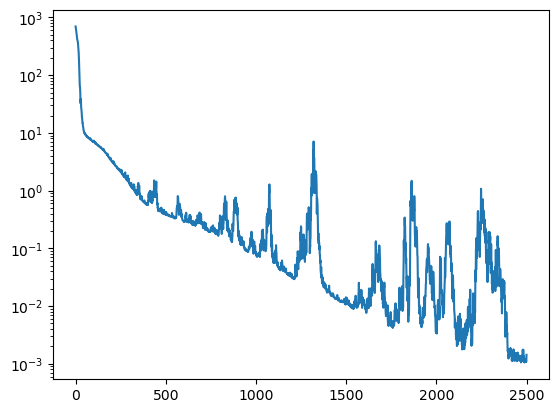

In [12]:
plt.semilogy(h.history['loss'])

In [10]:
u_pred = u.eval(x_discrete)

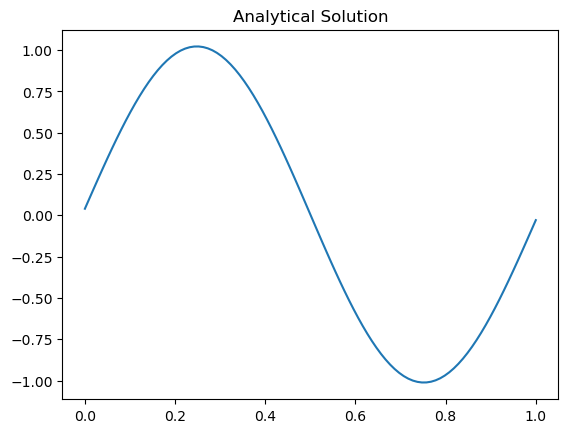

In [11]:
plt.figure
plt.title('Analytical Solution')
plt.plot(x_discrete, u_pred);